In [1]:
in_path =r'../../data/raw/' # use your path
out_path= "../../data/clean/"

import pandas as pd
pd.set_option('display.max_columns', 500)
import glob
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [4]:
allFiles = glob.glob(in_path + "/*.txt")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df_ = pd.read_table(file_,index_col=False, header=0)
    list_.append(df_)
df = pd.concat(list_)
df=df[~df.AB.isnull()]
df=df[(df.DT!='Correction') & (df.DT!='Editorial Material')]
df=df[df.PY<2016]
df=df[df.PY>=1990]
df.reset_index(inplace=True, drop=True)
df['id']=df.index
df.to_csv(out_path+"articles.csv")
print len(df)
node=df[['id','TI','PY','SO']]
node.rename(columns={'TI':'label'},inplace=True)
node.to_csv('../csv/nodes.csv',index=False)

2101


In [6]:
df

,﻿PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,SE,BS,LA,DT,CT,CY,CL,SP,HO,DE,ID,AB,C1,RP,EM,RI,OI,FU,FX,CR,NR,TC,Z9,U1,U2,PU,PI,PA,SN,EI,BN,J9,JI,PD,PY,VL,IS,PN,SU,SI,MA,BP,EP,AR,DI,D2,PG,WC,SC,GA,UT,PM,id
0,J,"Vance, A; Lowry, PB; Eggett, D",NaN,NaN,NaN,"Vance, Anthony; Lowry, Paul Benjamin; Eggett, ...",NaN,NaN,Using Accountability to Reduce Access Policy V...,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,access policy violations; accountability; acco...,COMPUTER-MEDIATED COMMUNICATION; ETHICAL DECIS...,Access policy violations by organizational ins...,"[Vance, Anthony] Brigham Young Univ, Marriott ...","Vance, A (reprint author), Brigham Young Univ,...",NaN,"Lowry, Paul/A-2790-2008","Lowry, Paul/0000-0002-0187-5808",City University of Hong Kong UCG [7200256],This work was supported in part by City Univer...,"ALEXANDER CS, 1978, PUBLIC OPIN QUART, V42, P9...",137,18,18,7,55,"ROUTLEDGE JOURNALS, TAYLOR & FRANCIS LTD",ABINGDON,"2-4 PARK SQUARE, MILTON PARK, ABINGDON OX14 4R...",0742-1222,1557-928X,NaN,J MANAGE INFORM SYST,J. Manage. Inform. Syst.,SPR,2013,29,4.0,NaN,NaN,NaN,NaN,263,289,NaN,10.2753/MIS0742-1222290410,NaN,27,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,175XF,WOS:000321266200011,NaN,0
1,J,"Willison, R; Warkentin, M",NaN,NaN,NaN,"Willison, Robert; Warkentin, Merrill",NaN,NaN,BEYOND DETERRENCE: AN EXPANDED VIEW OF EMPLOYE...,MIS QUARTERLY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Computer abuse; employee computer crime; infor...,INFORMATION-SYSTEMS SECURITY; RATIONAL CHOICE;...,Recent academic investigations of computer sec...,"[Willison, Robert] Newcastle Univ, Sch Busines...","Willison, R (reprint author), Newcastle Univ, ...",robert.willison@ncl.ac.uk; m.warkentin@msstate...,NaN,NaN,NaN,NaN,"ADAMS JS, 1965, ADV EXP SOC PSYCHOL, V2, P267;...",159,37,37,5,103,SOC INFORM MANAGE-MIS RES CENT,MINNEAPOLIS,UNIV MINNESOTA-SCH MANAGEMENT 271 19TH AVE SOU...,0276-7783,NaN,NaN,MIS QUART,MIS Q.,MAR,2013,37,1.0,NaN,NaN,NaN,NaN,1,20,NaN,NaN,NaN,20,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,176XQ,WOS:000321340500001,NaN,1
2,J,"Venkatesh, V; Brown, SA; Bala, H",NaN,NaN,NaN,"Venkatesh, Viswanath; Brown, Susan A.; Bala, H...",NaN,NaN,BRIDGING THE QUALITATIVE-QUANTITATIVE DIVIDE: ...,MIS QUARTERLY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Meta-inferences; mixed methods; multimethod; p...,DISTRIBUTED SOFTWARE-DEVELOPMENT; CRITICAL REA...,Mixed methods research is an approach that com...,"[Venkatesh, Viswanath] Univ Arkansas, Walton C...","Venkatesh, V (reprint author), Univ Arkansas, ...",vvenkatesh@vvenkatesh.us; suebrown@eller.arizo...,NaN,NaN,NaN,NaN,"AIS, 2007, SEN SCHOL BASK J; Alvesson M, 2007,...",147,79,80,10,137,SOC INFORM MANAGE-MIS RES CENT,MINNEAPOLIS,UNIV MINNESOTA-SCH MANAGEMENT 271 19TH AVE SOU...,0276-7783,NaN,NaN,MIS QUART,MIS Q.,MAR,2013,37,1.0,NaN,NaN,NaN,NaN,21,54,NaN,NaN,NaN,34,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,176XQ,WOS:000321340500002,NaN,2
3,J,"Adomavicius, G; Curley, SP; Gupta, A; Sanyal, P",NaN,NaN,NaN,"Adomavicius, Gediminas; Curley, Shawn P.; Gupt...",NaN,NaN,IMPACT OF INFORMATION FEEDBACK IN CONTINUOUS C...,MIS QUARTERLY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Online auctions; continuous combinatorial auct...,DESIGN; ALLOCATION; CONCEPTIONS; EXPERIENCE; M...,Advancements in information technology offer o...,"[Adomavicius, Gediminas; Curley, Shawn P.; Gup...","Adomavicius, G (reprint author), Univ Minnesot...",gedas@umn.edu; curley@umn.edu; alok@umn.edu; p...,NaN,NaN,National Science Foundation [SES-1024038],This research was supported in part by Nationa...,"Adomavicius G, 2005, INFORM SYST RES, V16, P16...",49,8,8,3,49,SOC INFORM MANAGE-MIS RES CENT,MINNEAPOLIS,UNIV MINNESOTA-SCH MANAGEMENT 271 19TH AVE SOU...,0276-7783,NaN,NaN,MIS QUART,MIS Q.,MAR,2013,37,1.0,NaN,NaN,NaN,NaN,55,+,NaN,NaN,N

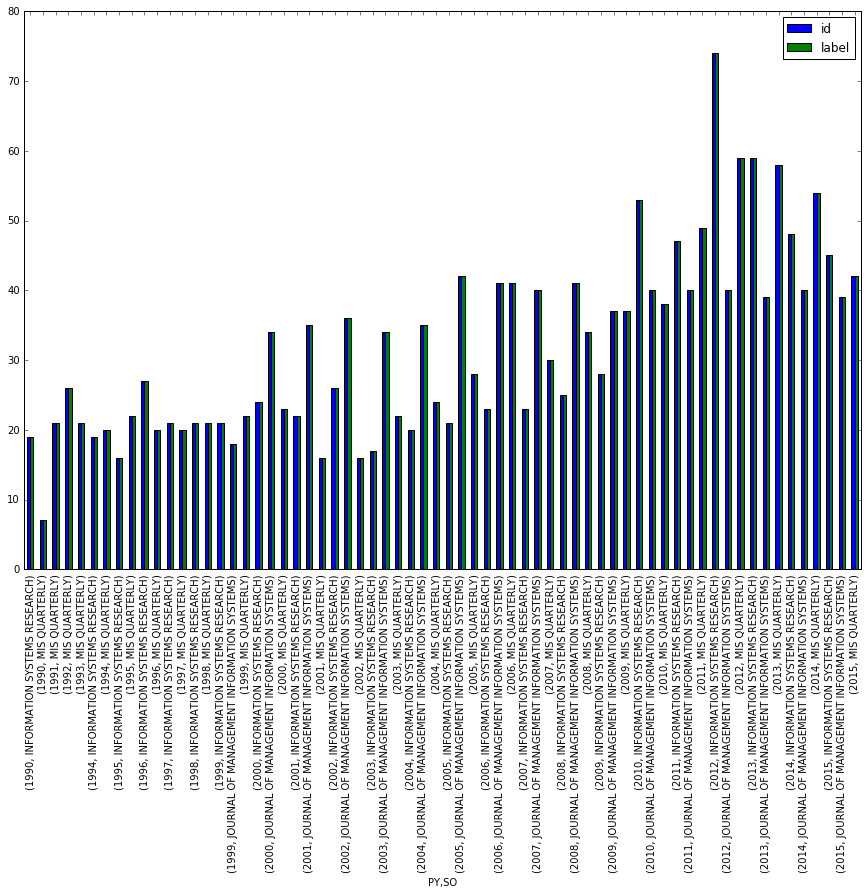

In [3]:
node.groupby(['PY','SO']).count().plot(kind='bar',figsize=(15,10))